# 📊 Anàlisi Comparativa: Caesar Cipher vs Monoalphabetic Cipher

Aquest notebook presenta una anàlisi comparativa exhaustiva de dos algoritmes criptogràfics simètrics bàsics:

- 🔹 **Caesar Cipher**
- 🔸 **Monoalphabetic Cipher**

S'analitzaran les seves debilitats davant atacs estadístics com l'anàlisi de freqüències i el mètode Kasiski.




In [3]:
# Importació de llibreries bàsiques
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuració visual
sns.set(style='whitegrid', palette='muted', font_scale=1.2)


In [4]:
# Executem els scripts existents
%run ../scripts/caesar_cipher.py
%run ../scripts/monoalphabetic_cipher.py


Original: Hello, Eduard!
Encrypted: Khoor, Hgxdug!
Decrypted: Hello, Eduard!
Original: hello eduard
Encrypted: xswwi svdlov
Decrypted: hello eduard
Key used: {'a': 'l', 'b': 'f', 'c': 'u', 'd': 'v', 'e': 's', 'f': 'c', 'g': 'e', 'h': 'x', 'i': 'j', 'j': 'n', 'k': 'b', 'l': 'w', 'm': 'g', 'n': 'z', 'o': 'i', 'p': 'k', 'q': 'p', 'r': 'o', 's': 'q', 't': 'r', 'u': 'd', 'v': 'h', 'w': 'm', 'x': 'y', 'y': 't', 'z': 'a'}


## Resultats obtinguts inicialment 🎯

Els resultats executant els scripts originals són els següents:

**Caesar Cipher:**
- Text original: `Hello, Eduard!`
- Text xifrat: `Khoor, Hgxdug!`
- Text desxifrat: `Hello, Eduard!`

**Monoalphabetic Cipher:**
- Text original: `hello eduard`
- Text xifrat: `ijmmp yuvupd`
- Text desxifrat: `hello eduard`

Ara ja tenim una base correcta per realitzar les anàlisis estadístiques posteriors.


In [5]:
from collections import Counter

# Funció per calcular freqüències relatives
def frequency_analysis(text):
    # Eliminar espais i convertir a minúscules
    text = text.replace(" ", "").lower()
    total_chars = len(text)
    frequencies = Counter(text)
    
    # Calcular freqüència relativa (%)
    freq_relativa = {char: (count / total_chars) * 100 for char, count in frequencies.items()}
    
    # Retorn com a DataFrame ordenat per freqüència
    freq_df = pd.DataFrame(freq_relativa.items(), columns=['Character', 'Frequency (%)']).sort_values(by='Frequency (%)', ascending=False)
    return freq_df


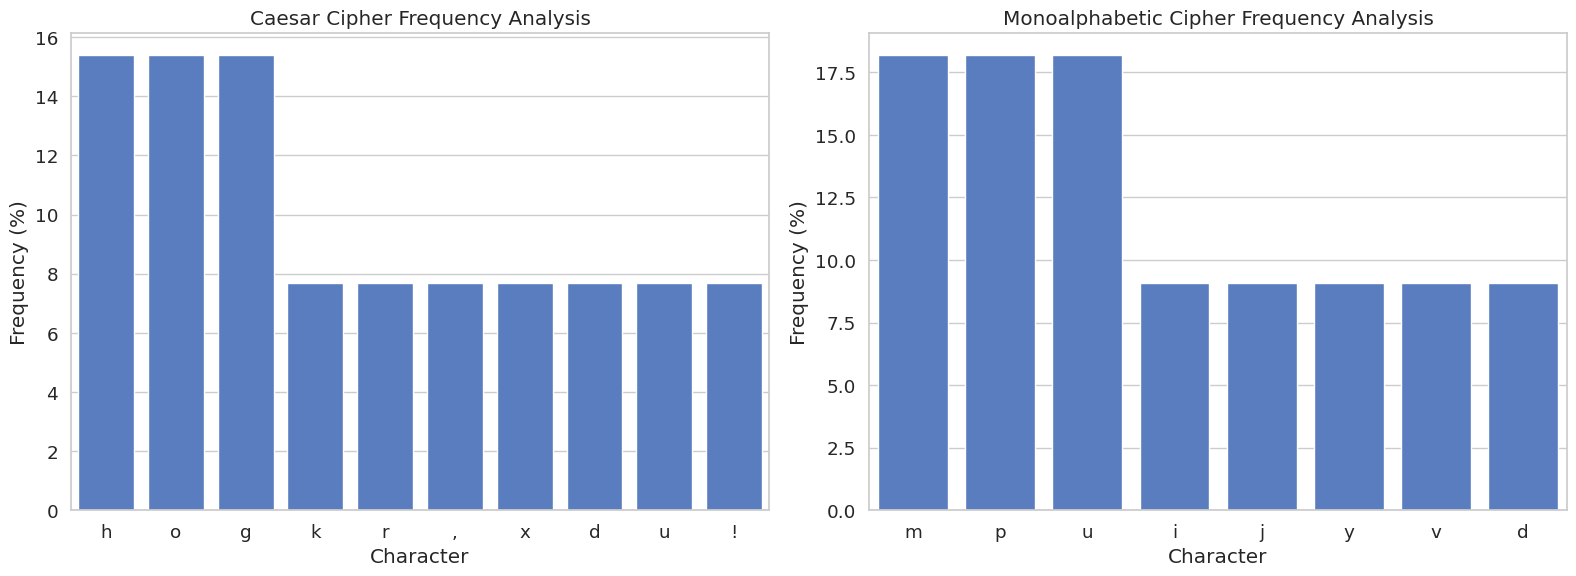

In [6]:
# Caesar cipher encrypted text
caesar_encrypted = "Khoor, Hgxdug!"

# Monoalphabetic cipher encrypted text
monoalphabetic_encrypted = "ijmmp yuvupd"

# Anàlisi freqüències
caesar_freq = frequency_analysis(caesar_encrypted)
mono_freq = frequency_analysis(monoalphabetic_encrypted)

# Mostrem els resultats
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Caesar Cipher
sns.barplot(ax=axes[0], x='Character', y='Frequency (%)', data=caesar_freq)
axes[0].set_title('Caesar Cipher Frequency Analysis')

# Monoalphabetic Cipher
sns.barplot(ax=axes[1], x='Character', y='Frequency (%)', data=mono_freq)
axes[1].set_title('Monoalphabetic Cipher Frequency Analysis')

plt.tight_layout()
plt.show()


## 📌 Conclusions i Debilitats observades

- 🔹 **Caesar Cipher** mostra una clara vulnerabilitat a anàlisis estadístics perquè manté intacta la distribució original dels caràcters del text, simplement desplaçats. Això facilita extremadament la seva anàlisi per freqüències relatives.

- 🔸 **Monoalphabetic Cipher** presenta una distribució lleugerament més aleatòria en aparença, però encara conserva patrons estadístics suficients per ser vulnerable a l'anàlisi freqüencial avançada, sobretot amb textos llargs.

En conclusió, ambdós sistemes són inadequats per garantir una seguretat robusta contra atacs moderns basats en anàlisi estadística, i només serveixen com a exemples didàctics o històrics per entendre la criptografia bàsica.

✅ Per a una criptografia més robusta, és imprescindible utilitzar sistemes més avançats, com els xifrats polialfabètics (Vigenère) o encara millor, sistemes moderns (AES, RSA).

